### Data Preprocessing and Cleaning

The following steps were performed to preprocess and clean the dataset:

1. **File Path and Column Names**:
    - Defined the file path as `conn.log.labeled` and manually specified the expected column names for the dataset.

2. **Reading the Data**:
    - Used `pandas.read_csv()` to load the data, specifying:
        - The file uses tab (`\t`) as a separator.
        - Lines starting with `#` should be skipped (as comments).
        - The file has no header row, so the column names were defined manually.

3. **Handling Missing Data**:
    - Columns with missing values were identified and replaced with `NaN` using the `replace()` method. 
    - Placeholder columns (with value `"-"`) were added if fewer than the expected number of columns were found.

4. **Cleaning Columns**:
    - The `tunnel_parents` column was split into three separate columns: `tunnel_parents`, `label`, and `detailed-label`. This was done using the `str.split()` method, which handles the space-separated values.

5. **Removing Empty Columns**:
    - Columns that contained only `NaN` values were identified and dropped.

6. **Displaying the Cleaned Data**:
    - The cleaned dataset was displayed using `df.head()`, which shows the first few rows.

In [1]:
import pandas as pd

# Define the file path
file_path = 'conn.log.labeled'

# Manually define the expected column names
column_names = [
    "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto",
    "service", "duration", "orig_bytes", "resp_bytes", "conn_state",
    "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts",
    "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "tunnel_parents"
]

# Read the file
df = pd.read_csv(
    file_path,
    sep="\t",  # Separator is tab
    comment="#",  # Skip lines starting with '#'
    header=None,  # No header in data section
    skip_blank_lines=True  # Avoid blank lines
)

# Add placeholder columns if fewer than expected
while df.shape[1] < len(column_names):
    df[df.shape[1]] = "-"

# Assign column names
df.columns = column_names

# Replace `-` with NaN for better handling of missing data
df.replace("-", pd.NA, inplace=True)

# Check which columns have only NaN values
all_na_columns = df.columns[df.isna().all()].tolist()
print(f"Columns with only missing values: {all_na_columns}")

# Optionally drop columns with only NaN
df.drop(columns=all_na_columns, inplace=True)

# Handle 'tunnel_parents' column to split space-separated values
df[['tunnel_parents', 'label', 'detailed-label']] = df['tunnel_parents'].str.split(r'\s+', n=2, expand=True)

# Display the cleaned dataset in a table
df.head()

Columns with only missing values: ['local_orig', 'local_resp']


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,<NA>,3.139211,0,...,S0,0,S,3,180,0,0,-,Benign,-
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,<NA>,<NA>,<NA>,...,S0,0,S,1,60,0,0,-,Benign,-
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,<NA>,<NA>,<NA>,...,S0,0,S,1,60,0,0,-,Benign,-
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,...,SF,2896,ShADadttcfF,94,5525,96,139044,-,Benign,-
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,<NA>,3.147116,0,...,S0,0,S,3,180,0,0,-,Benign,-


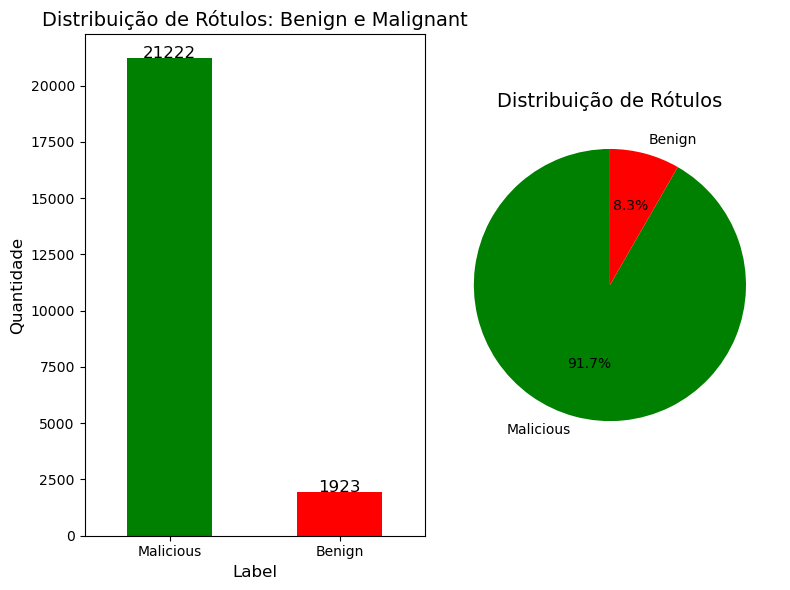

In [2]:
import matplotlib.pyplot as plt

# Contar a quantidade de cada tipo de 'label'
label_counts = df['label'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(8, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição de Rótulos: Benign e Malignant', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=0)

# Adicionar os valores no topo de cada barra
for i, v in enumerate(label_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribuição de Rótulos', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

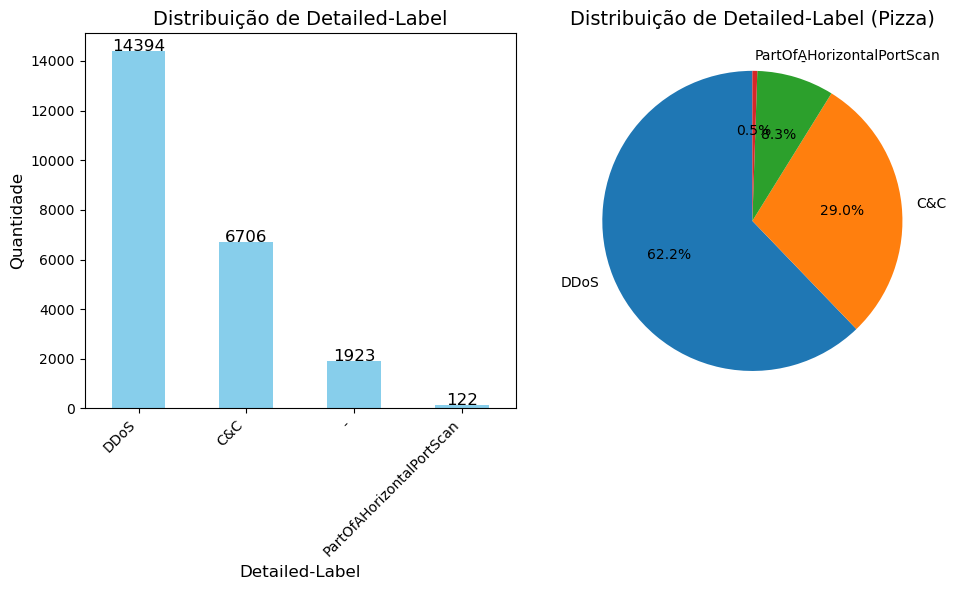

In [3]:
# Contar a quantidade de cada tipo de 'detailed-label'
detailed_label_counts = df['detailed-label'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
detailed_label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Detailed-Label', fontsize=14)
plt.xlabel('Detailed-Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for i, v in enumerate(detailed_label_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(detailed_label_counts, labels=detailed_label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Detailed-Label (Pizza)', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

detailed-label
C&C                          6706
DDoS                         5757
-                            1923
PartOfAHorizontalPortScan     122
Name: count, dtype: int64


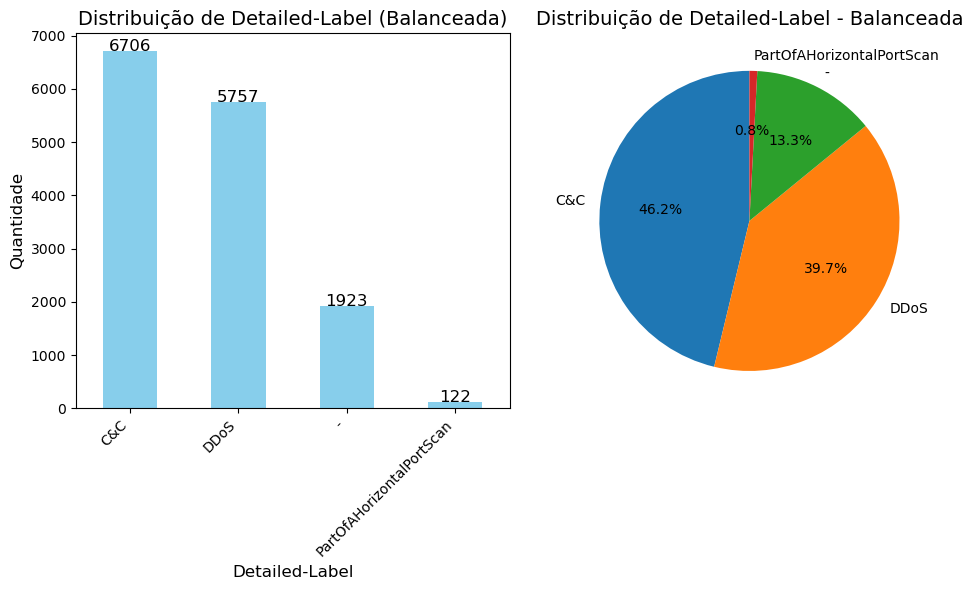

In [4]:
# Contar a quantidade de cada tipo de 'detailed-label'
detailed_label_counts = df['detailed-label'].value_counts()

# Verificar a quantidade da classe majoritária (DDoS)
ddos_count = detailed_label_counts['DDoS']

# Verificar a quantidade de dados da classe minoritária
minority_class_size = len(df[df['detailed-label'] != 'DDoS'])

# Definir o percentual de redução da classe DDoS
percentage_reduction = 0.6 # Exemplo: reduzir 50% da classe DDoS

# Calcular o número de amostras a serem mantidas na classe DDoS
ddos_undersample_size = int(ddos_count * (1 - percentage_reduction))

# Realizar undersampling na classe DDoS para a quantidade calculada
df_ddos_undersampled = df[df['detailed-label'] == 'DDoS'].sample(ddos_undersample_size, random_state=42)

# Manter a parte dos dados que não são DDoS
df_other = df[df['detailed-label'] != 'DDoS']

# Concatenar as duas partes balanceadas
df_balanced = pd.concat([df_ddos_undersampled, df_other])

# Embaralhar o DataFrame final para aleatorizar os dados
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição
print(df_balanced['detailed-label'].value_counts())

# Mostrar gráficos novamente para verificar a distribuição balanceada
detailed_label_counts_balanced = df_balanced['detailed-label'].value_counts()

plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
detailed_label_counts_balanced.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Detailed-Label (Balanceada)', fontsize=14)
plt.xlabel('Detailed-Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for i, v in enumerate(detailed_label_counts_balanced):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(detailed_label_counts_balanced, labels=detailed_label_counts_balanced.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Detailed-Label - Balanceada', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

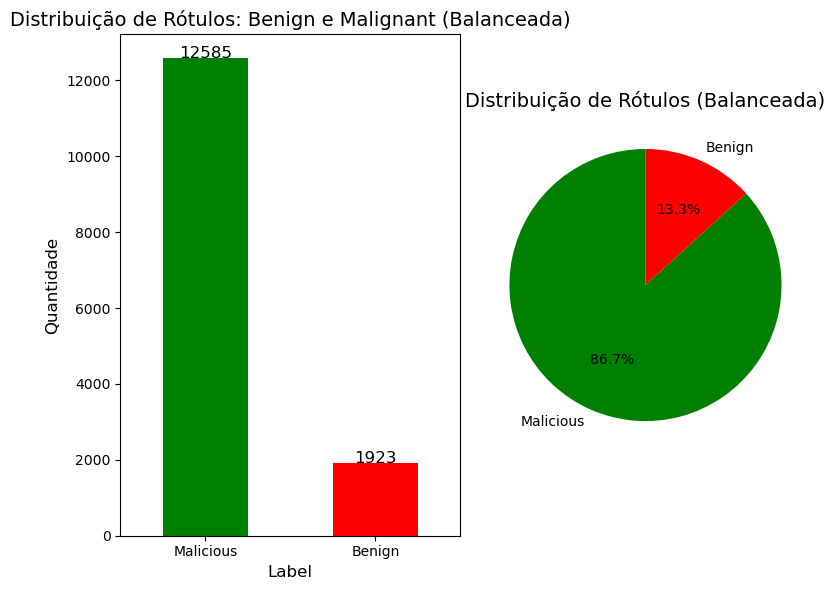

In [5]:
import matplotlib.pyplot as plt

# Contar a quantidade de cada tipo de 'label'
label_counts = df_balanced['label'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(8, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição de Rótulos: Benign e Malignant (Balanceada)', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=0)

# Adicionar os valores no topo de cada barra
for i, v in enumerate(label_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribuição de Rótulos (Balanceada)', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


label
Malicious    3860
Benign       1923
Name: count, dtype: int64


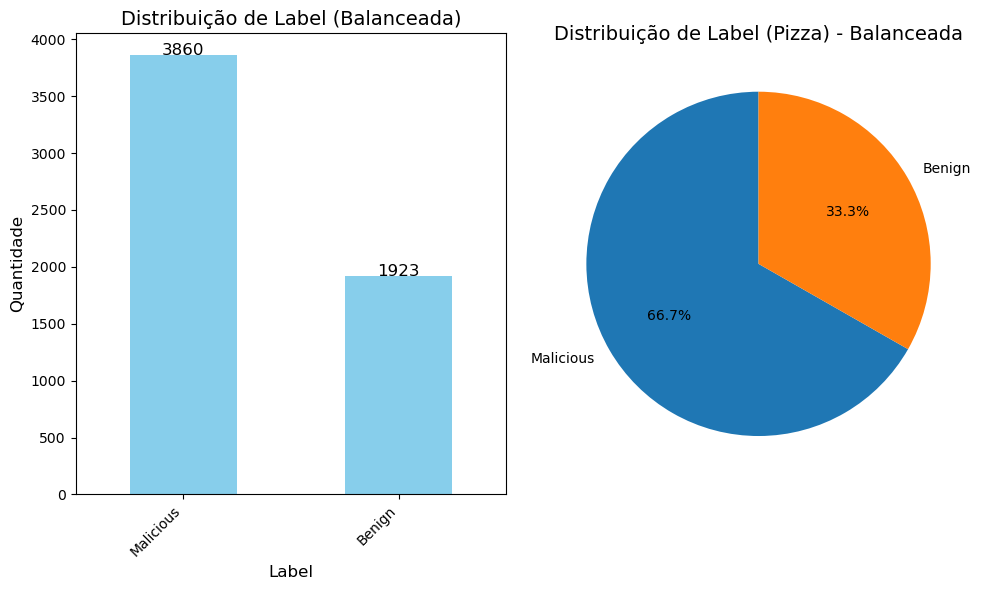

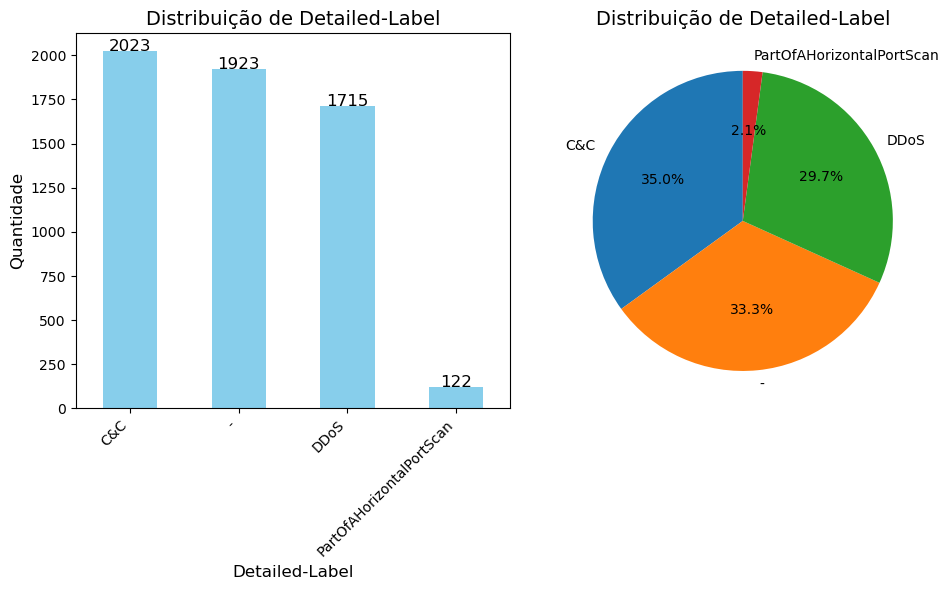

In [6]:
# Contar a quantidade de cada tipo de 'label'
detailed_label_counts = df_balanced['label'].value_counts()

# Verificar a quantidade da classe majoritária (Malicious)
malicious_count = detailed_label_counts['Malicious']

# Verificar a quantidade de dados da classe minoritária (Benign)
benign_count = detailed_label_counts['Benign']

# Definir o percentual de redução da classe Malicious
percentage_reduction_malicious = 0.7  # Exemplo: reduzir 70% da classe Malicious

# Dividir os dados da classe Malicious em duas partes:
# 1. Parte com detailed_label = 'PartOfAHorizontalPortScan'
df_malicious_partscan = df_balanced[(df_balanced['label'] == 'Malicious') & 
                                    (df_balanced['detailed-label'] == 'PartOfAHorizontalPortScan')]

# 2. Parte restante da classe Malicious (sem 'PartOfAHorizontalPortScan')
df_malicious_others = df_balanced[(df_balanced['label'] == 'Malicious') & 
                                   (df_balanced['detailed-label'] != 'PartOfAHorizontalPortScan')]

# Calcular o número de amostras a serem mantidas na parte restante da classe Malicious
malicious_undersample_size = int(df_malicious_others.shape[0] * (1 - percentage_reduction_malicious))

# Realizar undersampling na parte restante da classe Malicious
df_malicious_undersampled = df_malicious_others.sample(malicious_undersample_size, random_state=42)

# Manter a parte dos dados que não são Malicious
df_other = df_balanced[df_balanced['label'] != 'Malicious']

# Concatenar a parte não alterada de 'PartOfAHorizontalPortScan', 
# a parte reduzida de Malicious e os dados de outras classes
df_balanced = pd.concat([df_malicious_partscan, df_malicious_undersampled, df_other])

# Embaralhar o DataFrame final para aleatorizar os dados
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Exibir a nova distribuição
print(df_balanced['label'].value_counts())

# Mostrar gráficos novamente para verificar a distribuição balanceada
detailed_label_counts_balanced = df_balanced['label'].value_counts()

plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
detailed_label_counts_balanced.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Label (Balanceada)', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for i, v in enumerate(detailed_label_counts_balanced):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(detailed_label_counts_balanced, labels=detailed_label_counts_balanced.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Label (Pizza) - Balanceada', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Contar a quantidade de cada tipo de 'detailed-label'
detailed_label_counts = df_balanced['detailed-label'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
detailed_label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Detailed-Label', fontsize=14)
plt.xlabel('Detailed-Label', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for i, v in enumerate(detailed_label_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

# Criar gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(detailed_label_counts, labels=detailed_label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Detailed-Label', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

               duration  orig_bytes  resp_bytes  orig_pkts  orig_ip_bytes  \
duration       1.000000   -0.000074    0.043522   0.013347       0.003882   
orig_bytes    -0.000074    1.000000   -0.001532   0.044003       0.978566   
resp_bytes     0.043522   -0.001532    1.000000   0.011722       0.002609   
orig_pkts      0.013347    0.044003    0.011722   1.000000       0.248779   
orig_ip_bytes  0.003882    0.978566    0.002609   0.248779       1.000000   
resp_pkts      0.658854   -0.004353    0.653658   0.005630      -0.000937   
resp_ip_bytes  0.081936   -0.001703    0.998384   0.011751       0.002514   

               resp_pkts  resp_ip_bytes  
duration        0.658854       0.081936  
orig_bytes     -0.004353      -0.001703  
resp_bytes      0.653658       0.998384  
orig_pkts       0.005630       0.011751  
orig_ip_bytes  -0.000937       0.002514  
resp_pkts       1.000000       0.688925  
resp_ip_bytes   0.688925       1.000000  


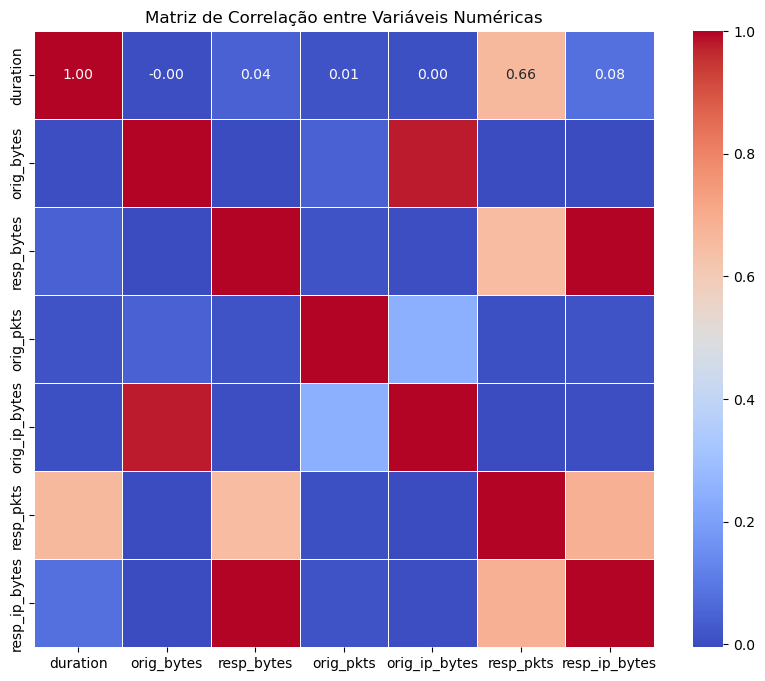

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Selecionar apenas as colunas numéricas relevantes para a correlação
numeric_columns = [
    'duration', 'orig_bytes', 'resp_bytes', 'orig_pkts', 'orig_ip_bytes', 
    'resp_pkts', 'resp_ip_bytes'
]

# Remover linhas com valores ausentes nas colunas numéricas
df_numeric_clean = df_balanced[numeric_columns].dropna()

# Calcular a matriz de correlação
corr_matrix = df_numeric_clean.corr()

# Exibir a matriz de correlação
print(corr_matrix)

# Criar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()